**Clustering Data Mall Customers Segementation Menggunakan Algoritma K-Means**
## 1. Import Library ##

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 2. Exploratory Data Analysis

In [140]:
data = pd.read_csv('dataset/Mall_Customers.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [141]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [142]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [143]:
# Cek Nilai Null
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [144]:
# Cek Duplikat Data
data.duplicated().sum()

0

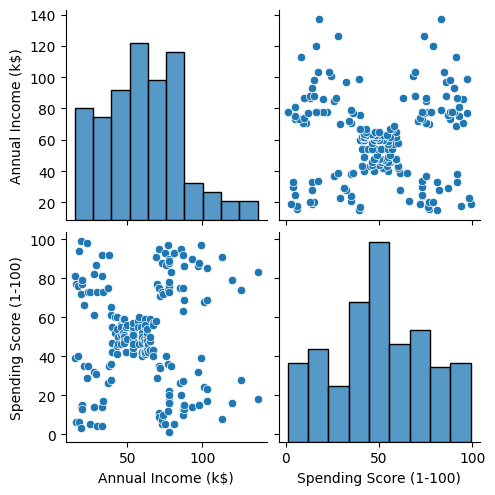

In [145]:
sns.pairplot(data[['Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

Setelah melihat pairplot diatas kita mendapatkan insight baru bahwa : 
1. Atribut gender tidak ada hubungan yang jelas
2. Age Punya Korelasi negatif dengan spending score
3. Income dan spending score menunjukan adanya segmentasi pelanggan
4. Maka data yang cocok digunakan untuk clustering pelanggan berdasarkan atribut Annual Income, dan Spending Score.


## 4. Penentuan Nilai K Elbow Method

In [146]:
data2 = data.iloc[:,[3,4]]
data2.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [147]:
x_array=np.array(data2)
x_array

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [148]:
# Feature Scalling 
scaler = MinMaxScaler()

xscale = scaler.fit_transform(x_array)
xscale

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

In [149]:
data_scale = pd.DataFrame(xscale, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

In [150]:
elbow = []
for i in range(1, 10):
    km = KMeans(n_clusters =  i)
    km.fit(data_scale[['Annual Income (k$)', 'Spending Score (1-100)']])
    elbow.append(km.inertia_)

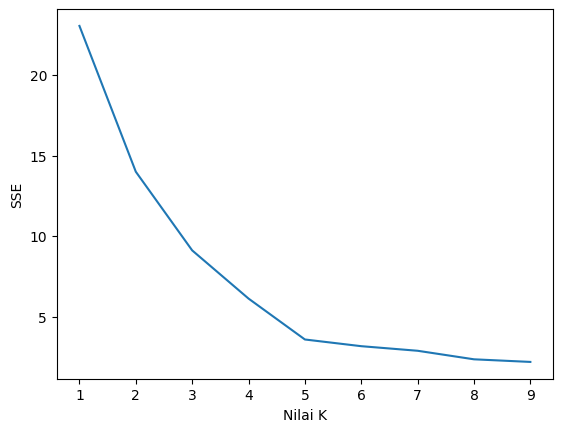

In [151]:
plt.xlabel('Nilai K')
plt.ylabel("SSE")
plt.plot(range(1,10), elbow)

In [152]:
# Model K-Means
modelling = KMeans(n_clusters=5, random_state=42)
data['cluster'] = modelling.fit_predict(data_scale[['Annual Income (k$)', 'Spending Score (1-100)']])
modelling

KMeans(n_clusters=5, random_state=42)

In [155]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


# 5. Visualisasi Data Hasil Clustering

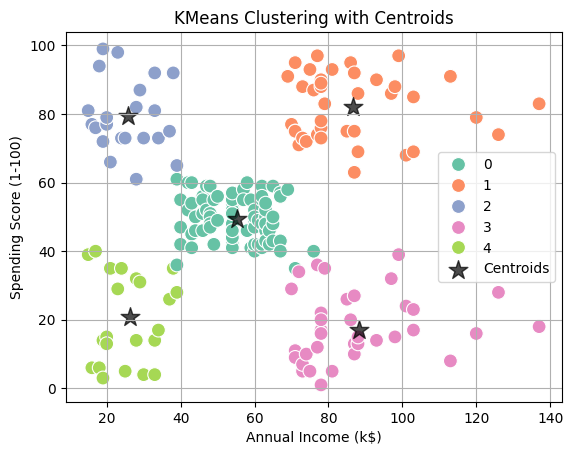

In [153]:
# Plot titik-titik klaster
sns.scatterplot(
    data=data,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='cluster',
    palette='Set2',
    s=100
)

# Tambahkan titik centroid
plt.scatter(
    centroids[:, 0],  # x: Annual Income (k$)
    centroids[:, 1],  # y: Spending Score (1-100)
    c='black',
    s=200,
    alpha=0.7,
    marker='*',
    label='Centroids'
)

plt.title('KMeans Clustering with Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [154]:
data.to_csv("Dataset_cluster.csv", index=False)

# 6. Kesimpulan

1. Cluster 0 (Hijau Toska)
Pendapatan: Menengah (~40k–70k)
Spending Score: Menengah (~40–60)

2. Cluster 1 (Oranye)
Pendapatan: Tinggi (~70k–120k)
Spending Score: Tinggi (~60–90)

3. Cluster 2 (Biru)
Pendapatan: Rendah (~15k–45k)
Spending Score: Tinggi (~60–90)

4. Cluster 3 (Pink)
Pendapatan: Tinggi (~70k–130k)
Spending Score: Rendah (~0–40)

5. Cluster 4 (Hijau Muda)
Pendapatan: Rendah (~15k–45k)
Spending Score: Rendah (~0–40)

Segmentasi ini membantu bisnis untuk menyusun strategi pemasaran yang lebih tepat berdasarkan kebiasaan pengeluaran dan daya beli pelanggan.